<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [90]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-05-15 22:09:10--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.07s   

2020-05-15 22:09:11 (304 KB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object 

In [4]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [5]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [3]:
#uiteraard maar 1 keer installeren...

# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

import seaborn as sns

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.1.1   |                0         132 KB  anaconda
    certifi-2020.4.5.1         |           py36_0         159 KB  anaconda
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB  anaconda
    seaborn-0.10.1             |             py_0         160 KB  anaconda
    ------------------------------------------------------------
                                           Total:         4.2 MB

The following packages will be UPDATED:

    ca-certificates: 2020.1.1-0         --> 2020.1.1-0        anaconda
    certifi:         2020.4.5.1-py36_0  --> 2020.4.5.1-py36_0 anaconda
    openssl:         1.1.1g-h7b6447c_0  --> 1.1.1g-h7b6447c_0 anaconda
    seaborn:         0.9.0-pyh91

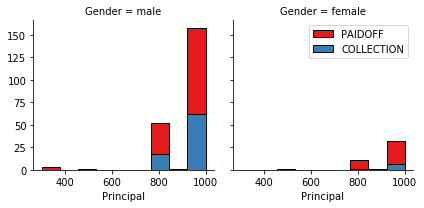

In [10]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

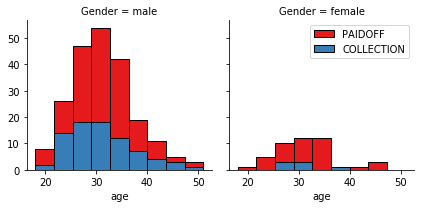

In [11]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

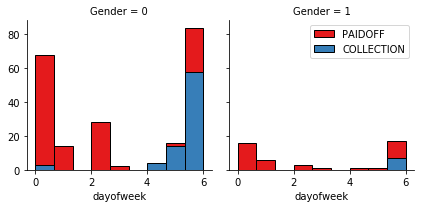

In [21]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [20]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [14]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [7]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0


## One Hot Encoding  
#### How about education?

In [16]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [12]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [19]:
# Sklearn Decision Trees do not handle categorical variables. But still we can convert these features to numerical values. pandas.get_dummies()
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature selection

Lets defind feature sets, X:

In [18]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?

In [20]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [17]:
# dit gaan we straks doen:  X= preprocessing.StandardScaler().fit(X).transform(X)
# X[0:5]

# opgelet met "/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: 
# DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler."

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

In [1]:
#alles samen, 

import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

!conda install -c anaconda seaborn -y
import seaborn as sns


Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.4.5.1         |           py36_0         159 KB  anaconda
    openssl-1.1.1g             |       h7b6447c_0         3.8 MB  anaconda
    ca-certificates-2020.1.1   |                0         132 KB  anaconda
    seaborn-0.10.1             |             py_0         160 KB  anaconda
    ------------------------------------------------------------
                                           Total:         4.2 MB

The following packages will be UPDATED:

    ca-certificates: 2020.1.1-0         --> 2020.1.1-0        anaconda
    certifi:         2020.4.5.1-py36_0  --> 2020.4.5.1-py36_0 anaconda
    openssl:         1.1.1g-h7b6447c_0  --> 1.1.1g-h7b6447c_0 anaconda
    seaborn:         0.9.0-pyh91

In [5]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
df = pd.read_csv('loan_train.csv')

df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df['loan_status'].value_counts()

df['dayofweek'] = df['effective_date'].dt.dayofweek
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
#nieuwe feature, is dit nu 6 dimensies? 
#moet ik hier .values bijzetten om alles naar float te brengen in de Numpy array?
#mss geeft dit dan geen problemen om te concatenaten. 
#op einde bij standardcaler (X.astype(float)) en onderweg value counts

Feature.drop(['Master or Above'], axis = 1,inplace=True)
X = Feature
y = df['loan_status'].values


# dit zou ook na test/train split kunnen.
X= preprocessing.StandardScaler().fit(X).transform(X.astype(float))

--2020-05-16 15:38:41--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.07s   

2020-05-16 15:38:42 (303 KB/s) - ‘loan_train.csv’ saved [23101/23101]



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
from sklearn.model_selection import train_test_split
X_train_model, X_test_model, y_train_model, y_test_model = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train_model.shape,  y_train_model.shape)
print ('Test set:', X_test_model.shape,  y_test_model.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [46]:
# I can try different k
# om mee te spelen
k=2

neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train_model,y_train_model)
yhat_model = neigh.predict(X_test_model)

from sklearn import metrics
accurancy = metrics.accuracy_score(y_test_model, yhat_model)
accurancy

0.6571428571428571

In [47]:
#for k from 1 to 15
Ks = 16
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_model,y_train_model)
    yhat_model =neigh.predict(X_test_model)
    mean_acc[n-1] = metrics.accuracy_score(y_test_model, yhat_model)

    
    std_acc[n-1]=np.std(yhat_model==y_test_model)/np.sqrt(yhat_model.shape[0])

mean_acc

array([0.67142857, 0.65714286, 0.71428571, 0.68571429, 0.75714286,
       0.71428571, 0.78571429, 0.75714286, 0.75714286, 0.67142857,
       0.7       , 0.72857143, 0.7       , 0.7       , 0.68571429])

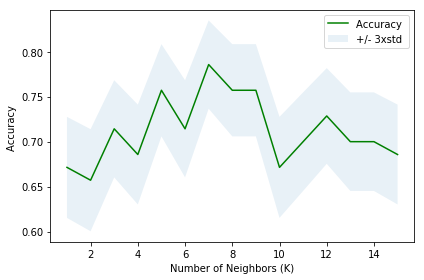

The best accuracy is 0.7857142857142857 with k= 7


In [48]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy is", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [93]:
# best k=7. we now train the model on totoal of x instead of the splitted x_model. Neigh stayes the same.
k=7

neigh = KNeighborsClassifier(n_neighbors = k).fit(X,y)

print(neigh)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')


In [ ]:
# nu k bepalen door 70-30% train test

In [73]:
from sklearn.model_selection import train_test_split
X_train_model7, X_test_model7, y_train_model7, y_test_model7 = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train_model7.shape,  y_train_model7.shape)
print ('Test set:', X_test_model7.shape,  y_test_model7.shape)

Train set: (242, 8) (242,)
Test set: (104, 8) (104,)


In [79]:
#for k from 1 to 15
Ks = 16
mean_acc7 = np.zeros((Ks-1))
std_acc7 = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh7 = KNeighborsClassifier(n_neighbors = n).fit(X_train_model7,y_train_model7)
    yhat_model7 =neigh7.predict(X_test_model7)
    mean_acc7[n-1] = metrics.accuracy_score(y_test_model7, yhat_model7)

    
    std_acc7[n-1]=np.std(yhat_model7==y_test_model7)/np.sqrt(yhat_model7.shape[0])

mean_acc7

array([0.71153846, 0.625     , 0.72115385, 0.72115385, 0.73076923,
       0.71153846, 0.72115385, 0.72115385, 0.75      , 0.68269231,
       0.69230769, 0.71153846, 0.71153846, 0.72115385, 0.71153846])

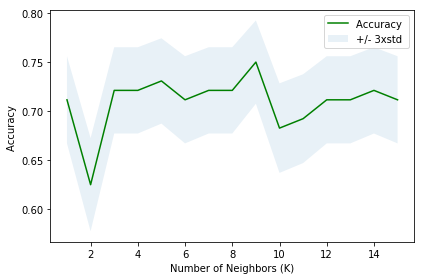

The best accuracy is 0.75 with k= 9


In [83]:
plt.plot(range(1,Ks),mean_acc7,'g')
plt.fill_between(range(1,Ks),mean_acc7 - 1 * std_acc7,mean_acc7 + 1 * std_acc7, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy is", mean_acc7.max(), "with k=", mean_acc7.argmax()+1) 

In [ ]:
# nu k bepalen door 90-10% train test

In [84]:
from sklearn.model_selection import train_test_split
X_train_model9, X_test_model9, y_train_model9, y_test_model9 = train_test_split( X, y, test_size=0.1, random_state=4)
print ('Train set:', X_train_model9.shape,  y_train_model9.shape)
print ('Test set:', X_test_model9.shape,  y_test_model9.shape)

Train set: (311, 8) (311,)
Test set: (35, 8) (35,)


In [85]:
#for k from 1 to 15
Ks = 16
mean_acc9 = np.zeros((Ks-1))
std_acc9 = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh9 = KNeighborsClassifier(n_neighbors = n).fit(X_train_model9,y_train_model9)
    yhat_model9 =neigh9.predict(X_test_model9)
    mean_acc9[n-1] = metrics.accuracy_score(y_test_model9, yhat_model9)

    
    std_acc9[n-1]=np.std(yhat_model9==y_test_model9)/np.sqrt(yhat_model9.shape[0])

mean_acc9

array([0.71428571, 0.62857143, 0.74285714, 0.71428571, 0.77142857,
       0.74285714, 0.82857143, 0.82857143, 0.8       , 0.82857143,
       0.77142857, 0.74285714, 0.77142857, 0.77142857, 0.74285714])

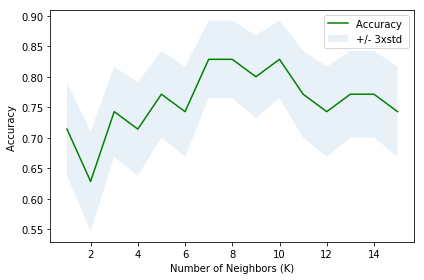

The best accuracy is 0.8285714285714286 with k= 7


In [86]:
plt.plot(range(1,Ks),mean_acc9,'g')
plt.fill_between(range(1,Ks),mean_acc9 - 1 * std_acc9,mean_acc9 + 1 * std_acc9, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy is", mean_acc9.max(), "with k=", mean_acc9.argmax()+1) 

In [94]:
yhat_KNN = neigh.predict(test_new_X)

# Decision Tree

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

# 70-30% train test
X_train_modelD7, X_test_modelD7, y_train_modelD7, y_test_modelD7  = train_test_split(X, y, test_size=0.3, random_state=3)

n_max_depth = 15
best_max_depth = 1
lists = [[],[]]

for m in range(3, n_max_depth):
    # modelling
    Tree7 = DecisionTreeClassifier(criterion="entropy", max_depth = m)
    Tree7.fit(X_train_modelD7, y_train_modelD7)
    pred7 = Tree7.predict(X_test_modelD7)
   

acc7 = metrics.accuracy_score(y_test_modelD7, pred7)
lists[0].append(acc)
lists[1].append(m)
if acc7== max(lists[0]):
    best_acc7 = acc7
    best_max_depth7 = m
    best_tree7 = Tree7
print("The best accuracy of DT7 is ", best_acc7, "with a max depth of", best_max_depth7)


# 80-20% train test
X_train_modelD8, X_test_modelD8, y_train_modelD8, y_test_modelD8 = train_test_split( X, y, test_size=0.2, random_state=4)

n_max_depth = 15
best_max_depth = 1
lists = [[],[]]

for m in range(3, n_max_depth):
    # modelling
    Tree8 = DecisionTreeClassifier(criterion="entropy", max_depth = m)
    Tree8.fit(X_train_modelD8, y_train_modelD8)
    pred8 = Tree8.predict(X_test_modelD8)

acc8 = metrics.accuracy_score(y_test_modelD8, pred8)
lists[0].append(acc)
lists[1].append(m)
if acc8== max(lists[0]):
        best_acc8 = acc
        best_max_depth8 = m
        best_tree8 = Tree8

print("The best accuracy of DT8 is ", best_acc8, "with a max depth of", best_max_depth8)

# 90-10% train test
X_train_modelD9, X_test_modelD9, y_train_modelD9, y_test_modelD9 = train_test_split( X, y, test_size=0.1, random_state=4)

n_max_depth = 15
best_max_depth = 1
lists = [[],[]]

for m in range(3, n_max_depth):
    # modelling
    Tree9 = DecisionTreeClassifier(criterion="entropy", max_depth = m)
    Tree9.fit(X_train_modelD9, y_train_modelD9)
    pred9 = Tree9.predict(X_test_modelD9)

acc9 = metrics.accuracy_score(y_test_modelD9, pred9)
lists[0].append(acc)
lists[1].append(m)
if acc9== max(lists[0]):
        best_acc9 = acc
        best_max_depth9 = m
        best_tree9 = Tree9

print("The best accuracy of DT9 is ", best_acc9, "with a max depth of", best_max_depth9)

#max_depth 14
Tree14 = DecisionTreeClassifier(criterion="entropy", max_depth = 14)
Tree14.fit(X,y)
print(Tree14)

yhat_DT = Tree14.predict(test_new_X)

In [32]:
#max_depth 4
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
Tree.fit(X,y)
print(Tree)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [33]:
yhat_DT = Tree.predict(test_new_X)

# Support Vector Machine

In [97]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
# in lab enkel rbf gebruikt... , niet linear, polynomial, sigmoid
clf.fit(X, y) 
yhat_SVM = clf.predict(test_new_X)

# Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X,y)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [99]:
yhat_LR = LR.predict(test_new_X)

# Model Evaluation using Test set

In [37]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix

First, download and load the test set:

### Load Test set for evaluation 

In [26]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

test_new_df = pd.read_csv('loan_test.csv')
test_new_df.head()

--2020-05-16 15:48:21--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-05-16 15:48:21 (336 MB/s) - ‘loan_test.csv’ saved [3642/3642]



,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [27]:
# nu voor test_new: 
test_new_df['due_date'] = pd.to_datetime(test_new_df['due_date'])
test_new_df['effective_date'] = pd.to_datetime(test_new_df['effective_date'])
test_new_df['loan_status'].value_counts()
test_new_df['dayofweek'] = test_new_df['effective_date'].dt.dayofweek
test_new_df['weekend'] = test_new_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_new_df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)
test_new_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
test_new_df.groupby(['education'])['loan_status'].value_counts(normalize=True)
test_new_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,1,3,0
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,0,4,1
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,1,5,1
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,0,5,1
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,0,6,1


In [10]:
test_new_df.shape

(54, 12)

In [28]:
test_new_Feature= test_new_df[['Principal','terms','age','Gender','weekend']]
test_new_Feature = pd.concat([test_new_Feature,pd.get_dummies(test_new_df['education'])], axis=1)

test_new_Feature.drop(['Master or Above'], axis = 1,inplace=True)
test_new_X = test_new_Feature
test_new_Y = test_new_df['loan_status'].values
test_new_X = preprocessing.StandardScaler().fit(test_new_X).transform(test_new_X.astype(float))

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [104]:
test_new_Y


array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'COLLECTION'], dtype=object)

KNN

In [105]:
yhat_KNN = neigh.predict(test_new_X)
yhat_KNN 

array(['PAIDOFF', 'PAIDOFF', 'COLLECTION', 'COLLECTION', 'COLLECTION',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'COLLECTION', 'PAIDOFF'], dtype=object)

In [106]:
jac_KNN = jaccard_similarity_score(test_new_Y, yhat_KNN)
F1_report_KNN = classification_report(test_new_Y, yhat_KNN)
F1_KNN = f1_score(test_new_Y, yhat_KNN, average='weighted') 

print(jac_KNN)
print(F1_report_KNN)
print(F1_KNN)

0.7222222222222222
              precision    recall  f1-score   support

  COLLECTION       0.44      0.29      0.35        14
     PAIDOFF       0.78      0.88      0.82        40

   micro avg       0.72      0.72      0.72        54
   macro avg       0.61      0.58      0.59        54
weighted avg       0.69      0.72      0.70        54

0.7001989201477693


DT

In [34]:
#max_depth 4
yhat_DT = Tree.predict(test_new_X)
yhat_DT

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'PAIDOFF',
       'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF'], dtype=object)

In [108]:
jac_DT = jaccard_similarity_score(test_new_Y, yhat_DT)
F1_report_DT = classification_report(test_new_Y, yhat_DT)
F1_DT = f1_score(test_new_Y, yhat_DT, average='weighted') 

print(jac_DT)
print(F1_report_DT)
print(F1_DT)

0.7777777777777778
              precision    recall  f1-score   support

  COLLECTION       0.75      0.21      0.33        14
     PAIDOFF       0.78      0.97      0.87        40

   micro avg       0.78      0.78      0.78        54
   macro avg       0.77      0.59      0.60        54
weighted avg       0.77      0.78      0.73        54

0.7283950617283951


In [35]:
#max_depth 14
yhat_DT14 = Tree14.predict(test_new_X)
yhat_DT14

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION', 'COLLECTION',
       'COLLECTION', 'PAIDOFF', 'COLLECTION', 'COLLECTION', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'COLLECTION', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'COLLECTION', 'COLLECTION', 'COLLECTION', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'COLLECTION', 'PAIDOFF'], dtype=object)

In [38]:
jac_DT14 = jaccard_similarity_score(test_new_Y, yhat_DT14)
F1_report_DT14 = classification_report(test_new_Y, yhat_DT14)
F1_DT14 = f1_score(test_new_Y, yhat_DT14, average='weighted') 

print(jac_DT14)
print(F1_report_DT14)
print(F1_DT14)

0.6851851851851852
              precision    recall  f1-score   support

  COLLECTION       0.40      0.43      0.41        14
     PAIDOFF       0.79      0.78      0.78        40

   micro avg       0.69      0.69      0.69        54
   macro avg       0.60      0.60      0.60        54
weighted avg       0.69      0.69      0.69        54

0.6886205279919816


SVM

In [109]:
yhat_SVM = clf.predict(test_new_X)
yhat_SVM

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'COLLECTION',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF'], dtype=object)

In [110]:
jac_SVM = jaccard_similarity_score(test_new_Y, yhat_SVM)
F1_report_SVM = classification_report(test_new_Y, yhat_SVM)
F1_SVM = f1_score(test_new_Y, yhat_SVM, average='weighted') 

print(jac_SVM)
print(F1_report_SVM)
print(F1_SVM)

0.7222222222222222
              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        14
     PAIDOFF       0.74      0.97      0.84        40

   micro avg       0.72      0.72      0.72        54
   macro avg       0.37      0.49      0.42        54
weighted avg       0.55      0.72      0.62        54

0.6212664277180406


LR

In [111]:
yhat_LR = LR.predict(test_new_X)
yhat_LR

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF',
       'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [112]:
yhat_LR_prob = LR.predict_proba(test_new_X)
yhat_LR_prob.shape

(54, 2)

In [113]:
jac_LR = jaccard_similarity_score(test_new_Y, yhat_LR)
print(jac_LR)

0.7407407407407407


In [114]:
F1_LR = f1_score(test_new_Y, yhat_LR, average='weighted') 
print(F1_LR)
F1_report_LR = classification_report(test_new_Y, yhat_LR)
print(F1_report_LR)

0.6304176516942475
              precision    recall  f1-score   support

  COLLECTION       0.00      0.00      0.00        14
     PAIDOFF       0.74      1.00      0.85        40

   micro avg       0.74      0.74      0.74        54
   macro avg       0.37      0.50      0.43        54
weighted avg       0.55      0.74      0.63        54



/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predic

In [121]:
F1_LR_PAIDOFF = 0,85
# F1_LR_COLLECTION = not possible to measure because no predicted COLLECTION.

IndentationError: unexpected indent (<ipython-input-121-11227dd0f4c8>, line 2)

In [116]:
# 9 on 54 COLLECTION for yhat_KNN
# 4 on 54 COLLECTION for yhat_DT
# 1 on 54 COLLECTION for yhat_SVM
#   !  0   !   on 54 COLLECTION for yhat_LR !!!

#in reality 14 last are 'COLLECTION' for test_new_Y !!!

In [117]:
logloss_LR = log_loss(test_new_Y, yhat_LR_prob)
print(logloss_LR)

0.5566084946309207


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |

In [119]:
import pandas as pd
columns = ['Algorithm','Jaccard', 'F1-score', 'LogLoss']
data = [['KNN', jac_KNN, F1_KNN, 'NA'],['Decision Tree', jac_DT, F1_DT, 'NA'],['SVM', jac_SVM, F1_SVM, 'NA'], ['LogisticRegression', jac_LR, F1_LR, logloss_LR]]
df_result = pd.DataFrame(data, columns=columns, dtype=float)
df_result 

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.722222,0.700199,NA
1,Decision Tree,0.777778,0.728395,NA
2,SVM,0.722222,0.621266,NA
3,LogisticRegression,0.740741,0.630418,0.556608


In [153]:
print("SVM and LR are performing really poor although Jaccard score is quite high!")
print("Nevertheless LR is the only model that doesn't catalogue a single person falsly as COLLECTION")

SVM and LR are performing really poor although Jaccard score is quite high!
Nevertheless LR is the only model that doesn't catalogue a single person falsly as collection


# Confusion Matrix

In [129]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
%matplotlib inline 
import matplotlib.pyplot as plt

In [143]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
plt.figure()   

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

Confusion matrix, without normalization
[[35  5]
 [10  4]]


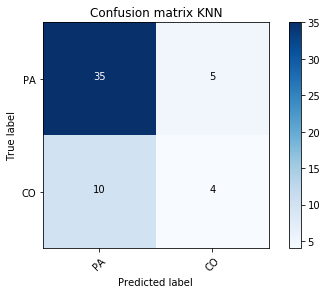

In [148]:
#KNN
cnf_matrix = confusion_matrix(test_new_Y, yhat_KNN, labels=['PAIDOFF','COLLECTION'])
plot_confusion_matrix(cnf_matrix, classes=['PA','CO'],normalize= False,  title='Confusion matrix KNN')

Confusion matrix, without normalization
[[39  1]
 [11  3]]


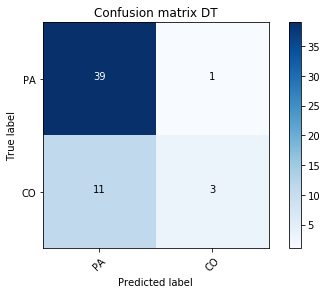

In [149]:
#DT
cnf_matrix = confusion_matrix(test_new_Y, yhat_DT, labels=['PAIDOFF','COLLECTION'])
plot_confusion_matrix(cnf_matrix, classes=['PA','CO'],normalize= False,  title='Confusion matrix DT')

Confusion matrix, without normalization
[[39  1]
 [14  0]]


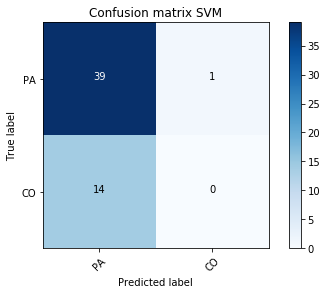

In [150]:
#SVM
cnf_matrix = confusion_matrix(test_new_Y, yhat_SVM, labels=['PAIDOFF','COLLECTION'])
plot_confusion_matrix(cnf_matrix, classes=['PA','CO'],normalize= False,  title='Confusion matrix SVM')

Confusion matrix, without normalization
[[40  0]
 [14  0]]


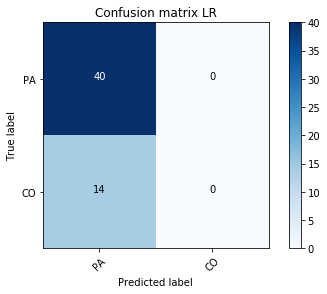

In [151]:
#LR
cnf_matrix = confusion_matrix(test_new_Y, yhat_LR, labels=['PAIDOFF','COLLECTION'])
plot_confusion_matrix(cnf_matrix, classes=['PA','CO'],normalize= False,  title='Confusion matrix LR')

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>